# Mini projet - Data mining - SDV Rennes 2023

## Objectif
Durant ce mini projet, on va essayer de travailler avec des données réelles.
Il est temps d'appliquer vos compétences acquises pendant cet enseignement dans un mini projet de modélisation décisionnelle à partir des données.
L'objectif est de déterminer la qualité d'un vin à partir de mesures des composantes chimiques.


## Sujet proposé
La prédiction de la qualité (entier entre 0 et 10) du vin à partir des mesures de ses composantes chimiques.
Pour ce mini projet, je propose d'utiliser ce dataset : http://archive.ics.uci.edu/ml/datasets/Wine+Quality


## Références utiles
- [Documentation scikit-learn](http://scikit-learn.org/stable/index.html)
- [Documentation Pandas](https://pandas.pydata.org/docs)
- [Documentation NumPy](https://docs.scipy.org/doc/numpy/user/index.html)
- [Documentation Matplotlib](http://matplotlib.org/)
- [Documentation Seaborn](https://seaborn.pydata.org/)
- [Dataset wine quality](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)


## Déroulement
- Pour qu'on soit efficace, et que ça soit un mini projet que vous pourriez utiliser comme référence, celui-ci sera guidé.
Comme ça va faire l'objet de la note finale de la partie pratique de l'examen (14 points), vous serez guidé par des exercices étape par étape.
- Vous pouvez travailler seul ou en binôme.



## Exercice 1 : Point métier
### Question 1.1 : Objectif
C'est quoi l'objectif de cette modélisation décisionnelle ? Dans la vraie vie, à ce stade, un point s'impose avec le PO pour clarifier le besoin. Aujourd'hui, vous portez sa casquette ;)  

**Réponse** : Déterminer la qualité d'un vin à partir de ses composants.

## Question 1.2 : Méthode décisionnelle
Analytiquement, existe-t-il une mét6hode qui nous permet de construire un modèle décisionnel fiable qui répond à l'objectif de l'étude ? Donnez une réponse logique, si possible avec un lien de référence.

**Réponse** : Nous avons une valeur qui oscille entre 0 et 10, ce qui constitue une variable quantitative. Les recherches sur internet ne permettent pas d'identifier une méthode mathématique prédéfinie pour estimer cette valeur bien qu'un ensemble de critères sont nécessaires pour cette estimation d'après [cet article](https://macaonews.org/fooddrinks/wine-tasting-essentials-part-1-how-to-inspect-a-wine-by-sight/). Parmis les méthodes factorielles, la méthode AFD ne constitue pas une méthode adéquate puisqu'elle est utilisée dans le cadre de l'analyse d'une variable qualitative, ou classification. **Nous allons donc nous orienter vers l'ACP pour réaliser cette modélisation décisionnelle puisqu'elle est la méthode d'estimation de variables continues**. Le reste du projet, on va adopter le choix d'appliquer une modélisation décisionnelle à partir des donées.  


**EDIT** : *LORS DE NOTRE MODELISATION, NOUS NOUS SOMMES RENDU COMPTE QUE LES TECHNIQUES DE MODÉLISATIONS POUR ESTIMER DES VARIABLES QUALITATIVES NE FONCTIONNENT PAS. EN CE SENS, NOUS NOUS SOMMES CONCENTRÉ SUR LA MODÉLISATION DE VARIABLE QUALITATIVES. LA VARIABLE QUALITY SERAIT ALORS UNE VALEUR CATEGORIELLE, AU MÊME TITRE QUE LE TYPE DE VIN*


## Exercice 2 : Chargement des données
### Question 2.1 : Création du dataset
Télécharger les 2 fichiers `winequality-red.csv` et `winequality-white.csv` depuis [ce lien](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)
Former votre dataset à partir des 2 fichiers déjà téléchargés.
Afficher les 3 premières lignes du dataset.

In [26]:
import pandas as pd

In [27]:
winequality_red = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
winequality_white = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

df_red = pd.read_csv(winequality_red, sep=';')
type_wine = ["white", "red"]
# Ajoute une colonne "type_wine" à df_red
df_red['type_wine'] = type_wine[1]
df_white = pd.read_csv(winequality_white, sep=';')
# Ajoute une colonne "type_wine" à df_white
df_white['type_wine'] = type_wine[0]
# Concatenate red and white wine data into a single DataFrame
df = pd.concat([df_red, df_white])
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


### Question 2.2 : Confirmation du choix du dataset
- Existe-t-il une différence entre les vins rouges et vins blancs en terme de qualité ?
- Pour répondre à cette question, tracer une courbe qui groupe les données suivant le type du vin.
- Sur le même graphique, mettez l'accent sur la qualité.
- Commenter le graphique ?

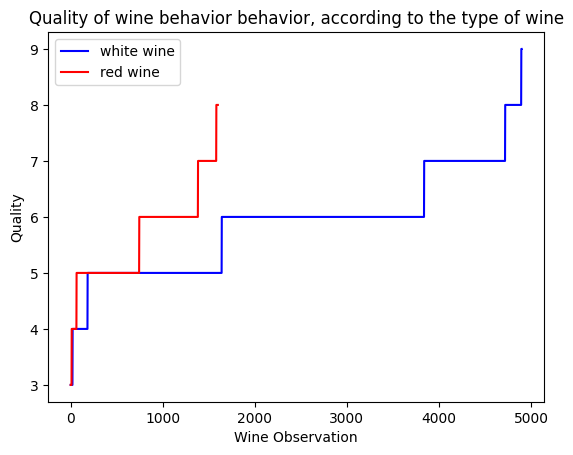

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_white.sort_values(by = "quality", inplace = True)
df_red.sort_values(by = "quality", inplace = True)
sns.lineplot(x=list(range(len(df_white))), y=df_white["quality"], data = df_white, color = "blue", label = "white wine")
sns.lineplot(x=list(range(len(df_red))), y=df_red["quality"], data = df_red, color = "red", label = "red wine")
plt.title("Quality of wine behavior behavior, according to the type of wine")
plt.xlabel("Wine Observation")
plt.ylabel("Quality")
plt.show()

### REALISATION DU GRAPHIQUE
1. Trier les datasets par qualité du vin.
2. Tracer une courbe qui montre le comportement de la qualité du vin en fonction du type de vin. 

### COMMENTAIRE DU GRAPHIQUE

En abscisses, on retrouve l'observation du vin.  
En ordonnées, on retrouve la qualité du vin.  

On peut observer que les vins blancs ont une qualité maximale supérieure aux vins rouges.  
Cependant, le nombre de vins rouges étant inférieures à celui des vins blancs ne permet pas de l'affirmer.

## Exercice 3 : Analyse exploratoire
**NB:** Pour le reste du projet, on va travailler avec le dataset formé par les vins rouges et blancs.


### Question 3.1 : Etat des lieux
- Afficher la description puis les informations du dataset
- Quel est le nombre d'observations qu'on a dans le dataset ?
- Combien de variables possède le dataset ?
>- Combien de variables continues ?
>- Combien de variables qualitatives ?

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type_wine             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


### COMMENTAIRE DE df.info()
Le dataset issu de la fusion des datasets des vins rouges et des vins blancs.  
Le dataset est consitué de 6497 observations.  
Le dataset possède 13 variables dont la variable à expliquer, quality. Il y a également une variable créée, type_wine, qui est le type de vin . Parmis ces variables, nous retrouvons 12 variables continues et une variable qualitative.

### Question 3.2 : Variables
- Quelles sont les variables explicatives ?
- Quelle est la variable expliquée ?

La variable expliquée est quality.  
Les autres variables sont les variables explicatives, sauf type_wine.

---

### Question 3.3 : Variables qualitatives
- Appliquez une transformation sur les variables qualitatives.

### Label Encoder

In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_labencod = df.copy()
df_labencod['type_wine_labencod'] = le.fit_transform(df['type_wine'])
df_labencod.drop("type_wine", axis = 1, inplace = True)
df_labencod.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine_labencod
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0


### One-Hot

In [31]:
dummies_wine = pd.get_dummies(df["type_wine"])
df_onehotencod = pd.concat([df, dummies_wine], axis = 1)
df_onehotencod.drop("type_wine", axis = 1, inplace = True)
df_onehotencod.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0


### COMMENTAIRE
Nous avons fait deux datasets pour **confronter les deux techniques d'encoding** : Label encoding vs One Hot

---

### Question 3.4 : Vérification des données manquantes
- Effectuez une vérification sur les données manquantes.
- Combien d'individus présentent des données manquantes ?

In [32]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_wine               0
dtype: int64

### Observations  
On peut voir qu'il n'y a aucune données manquantes.  
On l'avait déjà identifié dans la question 3.1 avec le df.info().

---

### Question 3.5 : Imputation des données manquantes
- En dehors du contexte de ce projet, proposez une méthode pour imputer des données manquantes.
- Pour ce projet, quelle méthode proposez-vous pour imputer des données manquantes ?
- Que faîtes-vous dans le cas où on a des données manquantes dans la colonne de la variable expliquée ?

### Réponse
- En dehors du contexte de ce projet, on propose d'appliquer la méthode de la moyenne.  
- Pour ce projet, on propose d'appliquer la méthode de la moyenne par type de vin.  
- Dans le cas où on a des données manquantes dans la colonne de la variable expliquée, on propose de supprimer les observations qui présentent des données manquantes.

---

### Question 3.6 : Analyse du nombre des observations par qualité
- Proposez un graphique afin de visualiser le nombre d'observations par qualité.
- Commentez ce graphique.

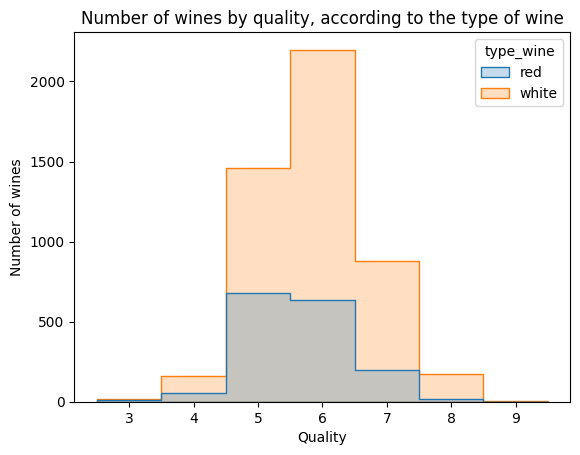

In [33]:
sns.histplot(data = df, x = df["quality"], hue = "type_wine", stat = "count", discrete = True, element = "step")
plt.title("Number of wines by quality, according to the type of wine")
plt.xlabel("Quality")
plt.ylabel("Number of wines")
plt.show()

### Question 3.7 : Analyse de la corrélation
- Proposer un graphique qui met en évidence la corrélation entre les différentes variables.
- Commenter ce graphique.

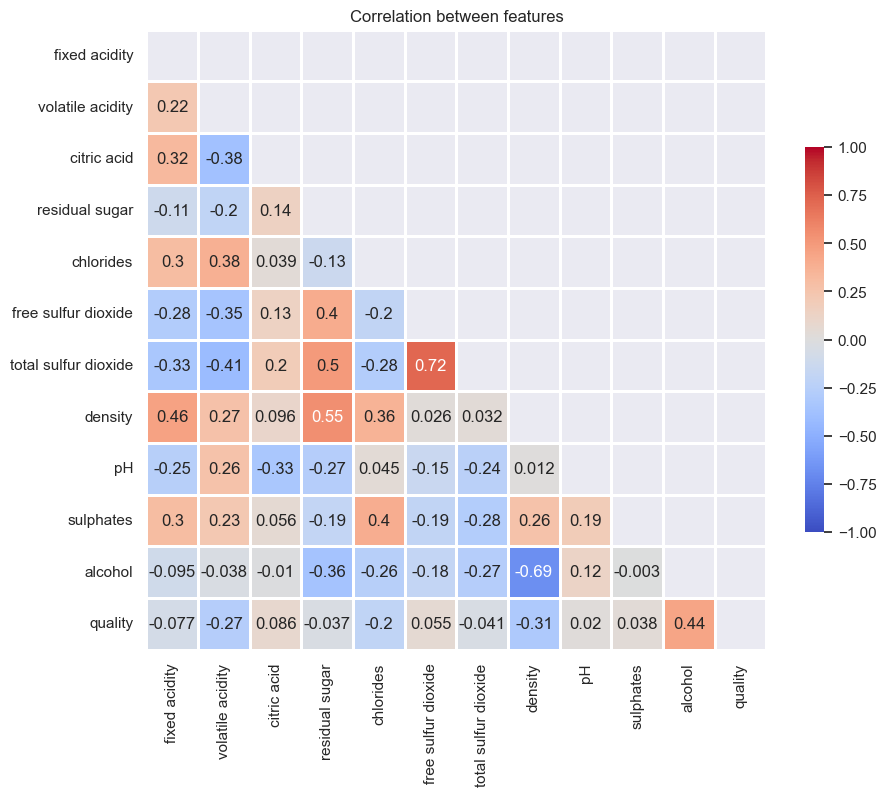

In [34]:
import numpy as np
df_corr = df.drop("type_wine", axis = 1)
corr = df_corr.corr()
plt.figure(figsize = (10, 10))
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot = True, cmap = "coolwarm",mask=mask, vmin = -1, vmax = 1, center = 0, square = True, linewidths = 1, cbar_kws = {"shrink": 0.5})
plt.title("Correlation between features")
plt.show()

### BONUS : HEATMAP 3D

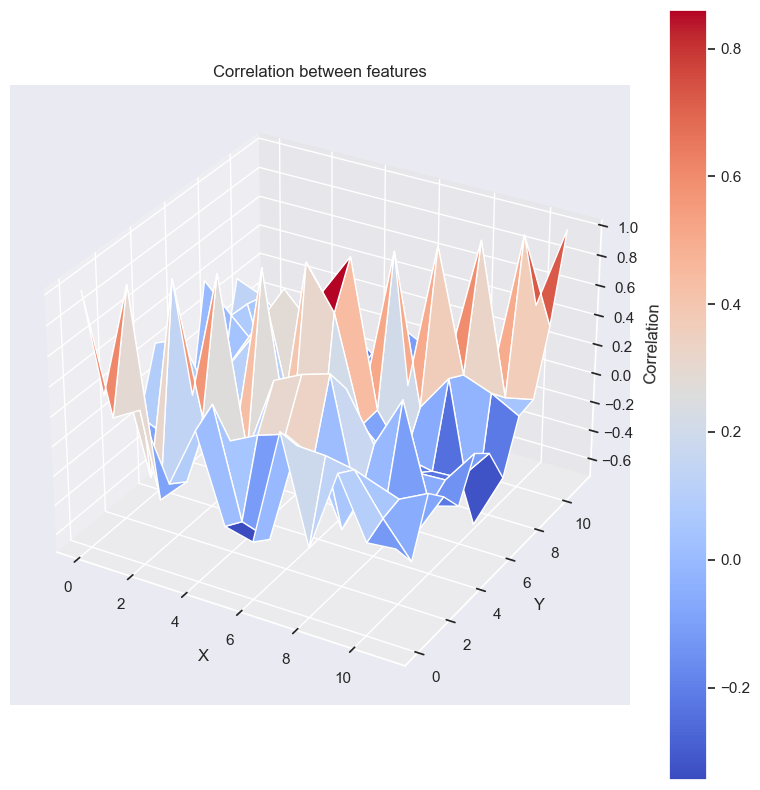

In [35]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Use the `%matplotlib notebook` magic command to enable interactive features

df_corr = df.drop("type_wine", axis = 1)
corr = df_corr.corr()

# Generate coordinates for the heatmap
X, Y = np.meshgrid(np.arange(corr.shape[0]), np.arange(corr.shape[1]))

# Get the values to be plotted
Z = corr.values

# Create a Figure and an Axes3D object
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='coolwarm')

# Add a colorbar
ax.figure.colorbar(ax.collections[0])

# Set the labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Correlation')
plt.title("Correlation between features")

plt.show()

### Question 3.8 : Fractionnement en Features X et Target y
- Fractionnez votre dataset en deux parties : `X` pour les features et `y` pour la variable cible.

### Label Encoder

In [36]:
df_labencod.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine_labencod
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0


In [37]:
# Découpage pour X
X_labencod = df_labencod.drop("quality", axis = 1)
X_labencod.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_wine_labencod
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0


In [38]:
# Découpage pour y
y_labencod = df_labencod["quality"]
y_labencod.head(3)

0    5
1    5
2    5
Name: quality, dtype: int64

### One Hot Encoder

In [39]:
X_onehotencod = df_onehotencod.drop("quality", axis = 1)
X_onehotencod.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,0


In [40]:
y_onehotencod = df_onehotencod["quality"]
y_onehotencod.head(3)

0    5
1    5
2    5
Name: quality, dtype: int64

### Question 3.9 : Split en subsets de Train et Test
- Formez les subsets d'entraînement (2/3) et de test (1/3)

In [41]:
from sklearn.model_selection import train_test_split

### Label Encoder

In [42]:
X_labencod_train, X_labencod_test, y_labencod_train, y_labencod_test = train_test_split(X_labencod, y_labencod, test_size = 1/3, random_state = 42)

### One Hot Encoder

In [43]:
X_onehotencod_train, X_onehotencode_test, y_onehotencod_train, y_onehotencod_test = train_test_split(X_onehotencod, y_onehotencod, test_size = 1/3, random_state = 42)

### Question 3.10 : Réduction des variables
- Avec vos propres mots, expliquez pourquoi on cherche à réduire le nombre des variables ?
- Appliquez une méthode de réduction de variables par sélection.
- Quelles sont les meilleures variables sélectionnées ? Expliquez cette sélection.
- Déterminez les nouveaux subsets des variables explicatives (`X_train_best` et `X_test_best`) après filtrage.
- Affichez les dimensions de `X_train_best` et `X_train`

In [44]:
from sklearn.feature_selection import VarianceThreshold

### Label Encoder

In [45]:
# Tout d'abord, nous allons calculer les variances pour estimer un seuil à donner au VarianceTreshold
import statistics
for col_name in list(X_labencod_train.columns):
  print(f"variance de {col_name} = {statistics.variance(X_labencod_train[col_name]):.2f}")

variance de fixed acidity = 1.65
variance de volatile acidity = 0.03
variance de citric acid = 0.02
variance de residual sugar = 23.02
variance de chlorides = 0.00
variance de free sulfur dioxide = 304.34
variance de total sulfur dioxide = 3110.25
variance de density = 0.00
variance de pH = 0.03
variance de sulphates = 0.02
variance de alcohol = 1.43
variance de type_wine_labencod = 0.18


**Commentaire** : nous choisissons comme seuil (threshold), 20.

In [46]:
threshold_labencod = 20
selector_labencod = VarianceThreshold(threshold=threshold_labencod)
selector_labencod.fit_transform(X_labencod_train)

# Nom des colonnes à garder
col_keep_labencod = selector_labencod.get_feature_names_out()

print(col_keep_labencod)

['residual sugar' 'free sulfur dioxide' 'total sulfur dioxide']


In [47]:
X_thresh20_train_best = X_labencod_train.loc[::, [col_name for col_name in list(X_labencod_train.columns) if col_name in col_keep_labencod]]
X_thresh20_train_best.head(3)

,residual sugar,free sulfur dioxide,total sulfur dioxide
1364,1.1,38.0,143.0
89,11.8,52.0,152.0
745,2.1,12.0,28.0


### One Hot Encoder

In [48]:
for col_name in list(X_onehotencod_train.columns):
  print(f"variance de {col_name} = {statistics.variance(X_onehotencod_train[col_name]):.2f}")

variance de fixed acidity = 1.65
variance de volatile acidity = 0.03
variance de citric acid = 0.02
variance de residual sugar = 23.02
variance de chlorides = 0.00
variance de free sulfur dioxide = 304.34
variance de total sulfur dioxide = 3110.25
variance de density = 0.00
variance de pH = 0.03
variance de sulphates = 0.02
variance de alcohol = 1.43
variance de red = 0.18
variance de white = 0.18


**Commentaire** : Nous constatons que les deux manières d'encoder le type de vin n'induit pas de variances significatives (0.18 avec le Label Encoder et 0.19, deux fois, avec le One hot Encoder). De ce fait, en gardant la même threshold, cela va avoir le même traitement sur les jeux de données qui ont pourtant des colonnes différentes pour l'encoding du type de vin (Nous allons avoir les mêmes variables à garder en sortie). Ainsi, pour forcer un changement dans l'estimation du modèle (ce qui était attendu lors de l'utilisation de deux encodeurs), nous faisons le choix de changer le threshold pour le One Hot Encoder, nous permettant de garder plus de variables que pour Label Encoder, sans sélectionner les variables issues de l'encodage du type de vin, quelque soit la méthode.

In [49]:
# Nous choissons un seuil de 0
threshold_onehotencod = 0
selector_onehotencod = VarianceThreshold(threshold=threshold_onehotencod)
selector_onehotencod.fit_transform(X_onehotencod_train)
col_keep_onehot = selector_onehotencod.get_feature_names_out()
print(col_keep_onehot)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'red' 'white']


In [50]:
X_thresh0_train_best = X_onehotencod_train.loc[::, [col_name for col_name in list(X_onehotencod_train.columns) if col_name in col_keep_onehot]]
X_thresh0_train_best.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red,white
1364,7.6,0.19,0.41,1.1,0.040,38.0,143.0,0.99070,2.92,0.42,11.4,0,1
89,7.1,0.44,0.62,11.8,0.044,52.0,152.0,0.99750,3.12,0.46,8.7,0,1
745,7.3,0.51,0.18,2.1,0.070,12.0,28.0,0.99768,3.52,0.73,9.5,1,0


### Réponse

La réduction des variables permet de réduire le nombre de variables à traiter sans supprimer les informations utiles (les variables qui expliquent le mieux la target), qui permet de diminuer le problème de fléau de la dimension. De plus, cela va permettre de supprimer le bruit.

### Question 3.11 :  Distribution des 4 meilleurs variables explicatives
- Proposer sur la même figure 4 graphiques qui mettent en évidence la distribution des 4 meilleures variables sélectionnées par filtrage.
- Que remarquez-vous ? Peut-on mieux optimiser les données d'entrée ?

### Threshold_variance = 20

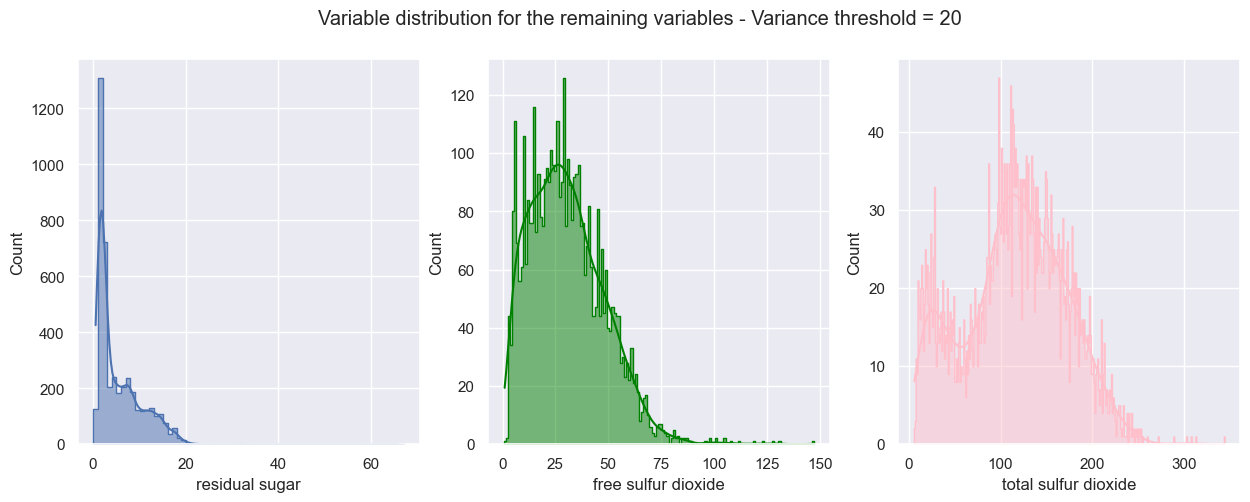

In [51]:
fig, axes = plt.subplots(1,3, figsize = [15,5])
sns.histplot(ax = axes[0], data = X_thresh20_train_best, x = "residual sugar", stat = "count", discrete = True, element = "step", kde = True)
sns.histplot(ax = axes[1], data = X_thresh20_train_best, x = "free sulfur dioxide", stat = "count", discrete = True, element = "step", color = "green", kde = True)
sns.histplot(ax = axes[2], data = X_thresh20_train_best, x = "total sulfur dioxide", stat = "count", discrete = True, element = "step", color = "pink", kde = True)
plt.suptitle("Variable distribution for the remaining variables - Variance threshold = 20")
plt.show()

### Threshold variance = 0

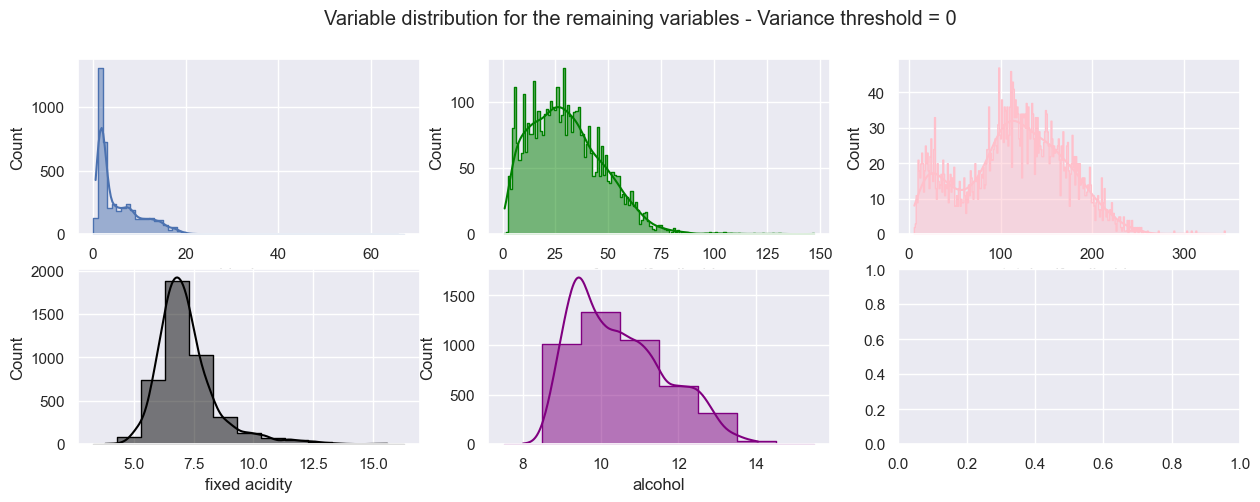

In [52]:
fig, axes = plt.subplots(2,3, figsize = [15,5])
sns.histplot(ax = axes[0,0], data = X_thresh0_train_best, x = "residual sugar", stat = "count", discrete = True, element = "step", kde = True)
sns.histplot(ax = axes[0,1], data = X_thresh0_train_best, x = "free sulfur dioxide", stat = "count", discrete = True, element = "step", color = "green", kde = True)
sns.histplot(ax = axes[0,2], data = X_thresh0_train_best, x = "total sulfur dioxide", stat = "count", discrete = True, element = "step", color = "pink", kde = True)
sns.histplot(ax = axes[1,0], data = X_thresh0_train_best, x = "fixed acidity", stat = "count", discrete = True, element = "step", color = "black", kde = True)
sns.histplot(ax = axes[1,1], data = X_thresh0_train_best, x = "alcohol", stat = "count", discrete = True, element = "step", color = "purple", kde = True)
plt.suptitle("Variable distribution for the remaining variables - Variance threshold = 0")
plt.show()

## Exercice 4 : Modélisation
### Question 4.1 : Remise à l'échelle
- Décrivez les distributions des différentes variables explicatives.
- Est-il nécessaire de mettre à l'échelle les données du dataset ? Justifiez votre réponse. Si c'est le cas faites-le.

### Réponse
- 
- Oui, il est nécessaire de mettre à l'échelle les données du dataset. En effet, les variables explicatives ne sont pas toutes sur la même échelle. Certaines variables ont des valeurs très élevées (free sulfur dioxide, total sulfur dioxide, residual sugar) alors que d'autres ont des valeurs très faibles (volatile acidity, citric acid, etc.). Il est donc nécessaire de mettre à l'échelle les données du dataset pour pouvoir les comparer correctement.

### Threshold variance = 20

In [53]:
print(col_keep_labencod) # Pour Threshold variance = 20

['residual sugar' 'free sulfur dioxide' 'total sulfur dioxide']


In [54]:
X_l1_normalize_20train_array = preprocessing.normalize(X_thresh20_train_best, norm='l1')
X_l2_normalize_20train_array = preprocessing.normalize(X_thresh20_train_best, norm='l2')

X_l1_normalize_20train = pd.DataFrame(X_l1_normalize_20train_array, columns = col_keep_labencod)

X_l2_normalize_20train = pd.DataFrame(X_l1_normalize_20train_array, columns = col_keep_labencod)
print(X_l2_normalize_20train.head(3))

   residual sugar  free sulfur dioxide  total sulfur dioxide
0        0.006041             0.208677              0.785283
1        0.054680             0.240964              0.704356
2        0.049881             0.285036              0.665083


### Threshold variance = 0

In [55]:
X_l1_normalize_0train_array = preprocessing.normalize(X_thresh0_train_best, norm='l1')
X_l2_normalize_0train_array = preprocessing.normalize(X_thresh0_train_best, norm='l2')

X_l1_normalize_0train = pd.DataFrame(X_l1_normalize_0train_array, columns = col_keep_onehot)
X_l2_normalize_0train = pd.DataFrame(X_l2_normalize_0train_array, columns = col_keep_onehot)
print(X_l2_normalize_0train.head(3))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.051131          0.001278     0.002758        0.007401   0.000269   
1       0.043960          0.002724     0.003839        0.073060   0.000272   
2       0.220992          0.015439     0.005449        0.063573   0.002119   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.255657              0.962078  0.006665  0.019645   0.002826   
1             0.321959              0.941111  0.006176  0.019318   0.002848   
2             0.363275              0.847642  0.030203  0.106561   0.022099   

    alcohol       red     white  
0  0.076697  0.000000  0.006728  
1  0.053866  0.000000  0.006192  
2  0.287593  0.030273  0.000000  


### Question 4.2 : Création du modèle
- Choisissez un modèle sklearn pour l'entrainer et créer le votre. [Documentation](https://scikit-learn.org/stable/supervised_learning.html)
- Exemples:
>- Pour une classification, vous pouvez utiliser l'un de ces modèles: [RidgeClassifier](https://scikit-learn.org/stable/modules/linear_model.html#classification), [SVC](https://scikit-learn.org/stable/modules/svm.html#classification), [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/tree.html#classification)
>- Pour une régression, vous pouvez utiliser l'un de ces modèles: [SVR](https://scikit-learn.org/stable/modules/svm.html#regression), [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/tree.html#regression)

### Threshold variance = 20

In [56]:
X_thresh20_test_raw = X_labencod_test.loc[::, [col_name for col_name in list(X_labencod_test.columns) if col_name in col_keep_labencod]] # Extraction 
X_l1_normalize_20test_array = preprocessing.normalize(X_thresh20_test_raw, norm='l1')
X_l2_normalize_20test_array = preprocessing.normalize(X_thresh20_test_raw, norm='l2')

X_l1_normalize_20test = pd.DataFrame(X_l1_normalize_20test_array, columns = col_keep_labencod) # NORMALIZATION L1
X_l2_normalize_20test = pd.DataFrame(X_l2_normalize_20test_array, columns = col_keep_labencod) # NORMALIZATION L2

In [57]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn import svm
from sklearn import tree
# model = LinearDiscriminantAnalysis() # Moyen, pas ouf. 0.45
# model = svm.SVR() # Nul à chier. 0.00
# model = svm.SVC() # Moyen, pas ouf. 0.45
# model = svm.LinearSVC() # Moyen, pas ouf. 0.46
model = tree.DecisionTreeClassifier() # Moyen. 0.51
# model = tree.DecisionTreeRegressor() # NEGATIF
# from sklearn.linear_model import Perceptron # Moyen. 0.31
# model = Perceptron(tol=1e-3, random_state=0)
# from sklearn.multiclass import OutputCodeClassifier # 0.46
# from sklearn.svm import LinearSVC # 0.46
# model = OutputCodeClassifier(LinearSVC(random_state=0),code_size=2, random_state=0) # 0.46
# from sklearn.naive_bayes import CategoricalNB # 0.45
# model = CategoricalNB() 
# from sklearn.neural_network import MLPClassifier # 0.45
# model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# ENTRAINEMENT ET SCORING AVEC L1
model_t20_l1 = model.fit(X_l1_normalize_20train, y_labencod_train) # Entrainement
score_t20_l1 = model_t20_l1.score(X_l1_normalize_20test, y_labencod_test)

# ENTRAINEMENT ET SCORING AVEC L2
model_t20_l2 = model.fit(X_l2_normalize_20train, y_labencod_train) # Entrainement
score_t20_l2 = model_t20_l2.score(X_l2_normalize_20test, y_labencod_test)

### Threshold variance = 0

In [58]:
X_thresh0_test_raw = X_onehotencode_test.loc[::, [col_name for col_name in list(X_onehotencode_test.columns) if col_name in col_keep_onehot]] # Extraction 
X_l1_normalize_0test_array = preprocessing.normalize(X_thresh0_test_raw, norm='l1')
X_l2_normalize_0test_array = preprocessing.normalize(X_thresh0_test_raw, norm='l2')

X_l1_normalize_0test = pd.DataFrame(X_l1_normalize_0test_array, columns = col_keep_onehot) # NORMALIZATION L1
X_l2_normalize_0test = pd.DataFrame(X_l2_normalize_0test_array, columns = col_keep_onehot) # NORMALIZATION L2

### Liste des résultats par modèle

- **Modèle** : LinearDiscriminantAnalysis :
    - Score t20 L1 : 0.51
    - Score t20 L2 : 0.07
    - Score t0 L1 : 0.50
    - Score t0 L2 : 0.49
- **Modèle** : svm.SVR : 
    - Score t20 L1 : 0.51
    - Score t20 L2 : 0.07
    - Score t0 L1 : 0.12
    - Score t0 L2 : 0.11
- **Modèle** : svm.SVC : 
    - Score t20 L1 : 0.51
    - Score t20 L2 : 0.07
    - Score t0 L1 : 0.46
    - Score t0 L2 : 0.46
- **Modèle** : svm.LinearSVC : 
    - Score t20 L1 : 0.51
    - Score t20 L2 : 0.07
    - Score t0 L1 : 0.48
    - Score t0 L2 : 0.49
- **Modèle** : tree.DecisionTreeClassifier : 
    - Score t20 L1 : 0.51
    - Score t20 L2 : 0.07
    - Score t0 L1 : 0.58
    - Score t0 L2 : 0.56
- **Modèle** : tree.DecisionTreeRegressor : 
    - Score t20 L1 : 0.51
    - Score t20 L2 : 0.07
    - Score t0 L1 : -0.01
    - Score t0 L2 : -0.06
- **Modèle** : sklearn.multiclass.OutputCodeClassifier & sklearn.svm.LinearSVC : 
    - Score t20 L1 : 0.51
    - Score t20 L2 : 0.07
    - Score t0 L1 : 0.47
    - Score t0 L2 : 0.48  

En conclusion, le meilleur modèle est le **tree.DecisionTreeClassifier** avec un score de 0.58 pour le threshold variance = 0 et une normalisation L1.

In [75]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn import svm
from sklearn import tree
# model = LinearDiscriminantAnalysis()
# model = svm.SVR() #Nul à chier. 0.1
# model = svm.SVC() # Moyen, pas ouf. 0.46
# model = svm.LinearSVC() # Moyen, pas ouf. 0.47
model = tree.DecisionTreeClassifier() # Moyen. 0.583
# model = tree.DecisionTreeRegressor() # NEGATIF
# from sklearn.multiclass import OutputCodeClassifier # 0.46
# from sklearn.svm import LinearSVC # 0.46
# model = OutputCodeClassifier(LinearSVC(random_state=0),code_size=2, random_state=0) # 0.479
# from auto-sklearn import AutoSklearnClassifier
# model = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=8)
# ENTRAINEMENT ET SCORING AVEC L1
model_t0_l1 = model.fit(X_l1_normalize_0train, y_onehotencod_train) # Entrainement
score_t0_l1 = model_t0_l1.score(X_l1_normalize_0test, y_onehotencod_test)

# ENTRAINEMENT ET SCORING AVEC L2
model_t0_l2 = model.fit(X_l2_normalize_0train, y_onehotencod_train) # Entrainement
score_t0_l2 = model_t0_l2.score(X_l2_normalize_0test, y_onehotencod_test)

### Question 4.3 : Evaluation du modèle
- Calculez la précision du score sur le subset d'entrainement puis sur le subset de test

In [76]:
print("== SUBSETS DE TEST ==")
print(f"Score t20 L1 : {score_t20_l1:.2f}")
print(f"Score t20 L2 : {score_t20_l2:.2f}")
print(f"Score t0 L1 : {score_t0_l1:.2f}")
print(f"Score t0 L2 : {score_t0_l2:.2f}")

== SUBSETS DE TEST ==
Score t20 L1 : 0.51
Score t20 L2 : 0.07
Score t0 L1 : 0.58
Score t0 L2 : 0.57


---

### Question 4.4 : Optimisation du résultat
- Pourriez-vous proposer une méthode qui optimise plus encore la précision du modèle sélectionné ?
- Pourriez-vous proposer une méthode qui permet de déterminer le meilleur modèle parmi une liste définie de modèles ?

Pour optimiser le modèle, Nous conseillons d'avoir **plus de variables explicatives** pour augmenter le nombre d'informations utiles. De plus, il serait intéressant d'avoir un **jeu de donnée équitable** entre le nombre de vin dits "rouge" et dits "blancs", puisque lors du split du dataset, les jeux de données ne sont pas équilibrés, avec plus de vins blancs puisque leur présence est plus grande que celle des rouges.  
Concernant la méthode de détermination du meilleur modèle parmi une liste définie de modèle, il existe des méthodes comme **le grid search** qui va tester un nombre de paramètres pour chaque modèle, selon la grille de paramètre que l'on définiera.

---

### Question 4.5 : Prédiction
Prédire la qualité du vin (rouge) dont les composants chimiques sont les suivantss:
`
'fixed acidity': 7,
'volatile acidity': 0.7,
'citric acid': 0,
'residual sugar': 2,
'chlorides': 0.1,
'free sulfur dioxide': 13,
'total sulfur dioxide': 40,
'density': 0.99,
'pH': 3.5,
'sulphates': 0.6,
'alcohol': 9.5
`

In [63]:
# Nous allons utiliser le modèle entrainé avec un threshold de 1 et une normalisation l1
predict_this = {'fixed acidity': [7],
'volatile acidity': [0.7],
'citric acid': [0],
'residual sugar': [2],
'chlorides': [0.1],
'free sulfur dioxide': [13],
'total sulfur dioxide': [40],
'density': [0.99],
'pH': [3.5],
'sulphates': [0.6],
'alcohol': [9.5],
'type wine' : ['red']}

def predict_wine_quality(wine_input : dict, col_keep : list, model):
    """
    Predict the wine quality based on inputs
    """
    wine_red = [1 if item == 'red' else 0 for item in wine_input['type wine']]
    wine_white = [1 if item == 'white' else 0 for item in wine_input['type wine']]
    data_df_raw = pd.DataFrame.from_dict(wine_input)
    data_df_raw['red'] = wine_red
    data_df_raw['white'] = wine_white
    
    data_df_filter = data_df_raw.loc[::, [col_name for col_name in list(data_df_raw.columns) if col_name in col_keep]]
    data_array_l1 = preprocessing.normalize(data_df_filter, norm='l1')
    data_df_l1 = pd.DataFrame(data_array_l1, columns = col_keep)

    # Run prediction
    quality_prediction = {'quality' : list(model.predict(data_array_l1))}
    return quality_prediction


In [64]:
quality_predicted = predict_wine_quality(wine_input = predict_this, col_keep = col_keep_onehot, model = model_t0_l1)
print(quality_predicted)

{'quality': [5.228449099367111]}


c:\Users\leo49\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


---

### Question 4.6 : Sauvegarde du modèle
- Exporter le modèle dans un format utilisable par une api externe.

In [ ]:
import pickle
# save the model to disk
filename = 'model_t0_l1.sav'
pickle.dump(model_t0_l1, open(filename, 'wb'))

## Exercice 5 : Utilisation externe du modèle
- Avec une techno de votre choix, développez une api qui utilise le modèle déjà exporté dans la question 4.6.

lien vers le fichier : [predict_quality_api](./predict_quality_api.py)  
lien vers la documentation : [documentation](./readme.md)

# Auteur
- [Mohamed ZWAWA](https://www.linkedin.com/in/mtzwawa)

For more content, follow :  
👑 @iziatask on 🐦 Twitter  
👑 @BeguinKyllian on 🐦 Twitter